# Used Cars Analysis and price prediction 
## by Khaled Emad

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Preprocessing</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ML">Machine Learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset is about the used cars which contatins features like price, condition, manufacturer, latitude/longitude, and 18 other categories for every car in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib
sns.set(rc={'figure.figsize': [15, 12]}, font_scale=1.2)

In [2]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


<a id='wrangling'></a>
## Data Preprocsessing
>in this section I will check the datatybe of all the clolums and check if there is any null values or duplicates




In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
df.shape

(426880, 26)

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [8]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column id
------------------

7312775165    1
7310416174    1
7316392516    1
7311147589    1
7307281658    1
             ..
7316642868    1
7304055862    1
7311393847    1
7314270665    1
7314872323    1
Name: id, Length: 426880, dtype: int64


For column url
------------------

https://raleigh.craigslist.org/cto/d/clayton-2014-bmw-x50i-sports/7315978572.html               1
https://fresno.craigslist.org/ctd/d/san-luis-obispo-2014-honda-cr-awd-5dr-lx/7311562816.html    1
https://eugene.craigslist.org/ctd/d/eugene-2004-chevrolet-avalanche-185-per/7311060807.html     1
https://capecod.craigslist.org/ctd/d/hyannis-2008-honda-fit-sport-4dr/7315242720.html           1
https://visalia.craigslist.org/ctd/d/visalia-2011-mercedes-benz-class-63-amg/7302531923.html    1
                                                                                               ..
https://orlando.craigslist.org/ctd/d/sanford-2019-chevrolet-malibu-rs-skukf/7311769279.html     1
https://frederick.craigslist

2021-04-23T22:13:05-0400    12
2021-04-13T13:19:15-0500    11
2021-04-22T20:32:05-0400    11
2021-04-16T12:07:56-0500    10
2021-04-30T10:01:13-0400     9
                            ..
2021-04-25T09:49:09-0400     1
2021-04-10T17:42:10-0700     1
2021-05-03T13:18:22-0700     1
2021-04-15T10:59:47-0500     1
2021-05-03T07:45:06-0500     1
Name: posting_date, Length: 381536, dtype: int64




first will drop the unnecessary cloumns 

In [9]:
df= df.drop(columns=['id','url', 'region_url', 'image_url', 'description','county'], axis=1)


In [10]:
df= df.drop(columns=['VIN'], axis=1)

In [11]:
df= df.drop(columns=['posting_date'], axis=1)

In [12]:
df= df.drop(columns=['region'], axis=1)

In [13]:
df= df.drop(columns=['state','lat', 'long'], axis=1)


In [14]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver


Will handle the missing values for numirical columns

In [15]:
df.isnull().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

In [16]:
imputer = KNNImputer()
for col in ['year', 'odometer']:
    df[col] = imputer.fit_transform(df[[col]])

In [17]:
df.isnull().sum()

price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64

handling missing values for categorical data 

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
for col in ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']:
    df[col] = imputer.fit_transform(df[[col]])

In [19]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

All the missing data were handled now will deal with outliers 

## outlier

In [30]:
from datasist.structdata import detect_outliers


In [31]:
for col in ['year', 'odometer']:
    outliers_indices = detect_outliers(df, 0, [col])

In [32]:
len(outliers_indices)

3210

<AxesSubplot:xlabel='price'>

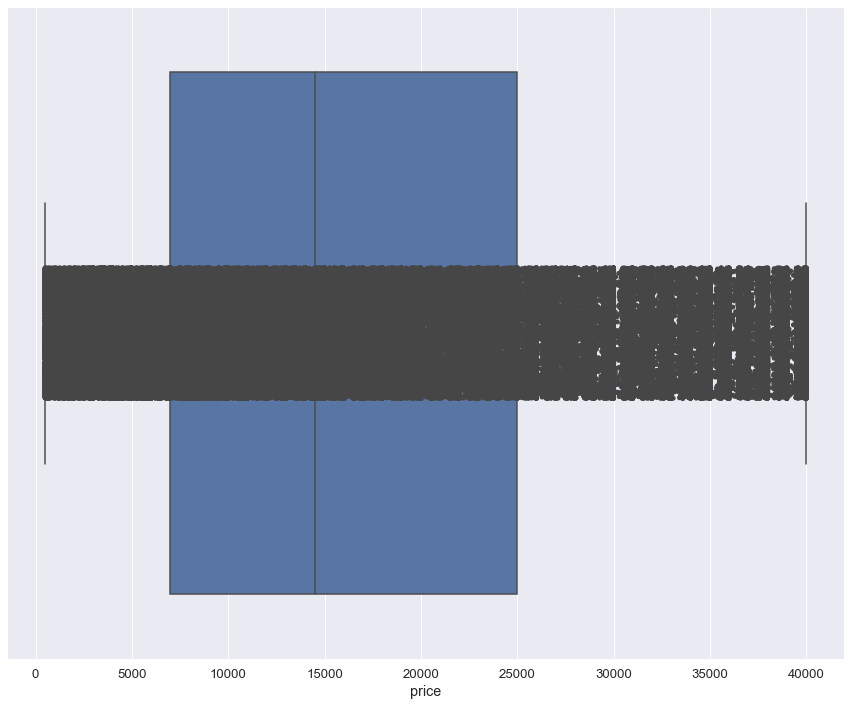

In [33]:
sns.boxplot(x='price', data=df)
sns.stripplot(x='price', data=df, color="#474646")

In [34]:
df.drop(outliers_indices, inplace=True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
1,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
2,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
3,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
4,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white
426876,30590,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red
426877,34990,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white
426878,28990,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver


In [35]:
df.describe()

,price,year,odometer
count,351608.000000,351608.000000,351608.000000
mean,16524.896672,2010.818997,95281.807715
std,10752.812617,8.771324,60746.661526
min,500.000000,1941.000000,0.000000
25%,7200.000000,2008.000000,42679.750000
50%,14500.000000,2013.000000,92620.000000
75%,24990.000000,2016.000000,137939.000000
max,39999.000000,2022.000000,283749.000000


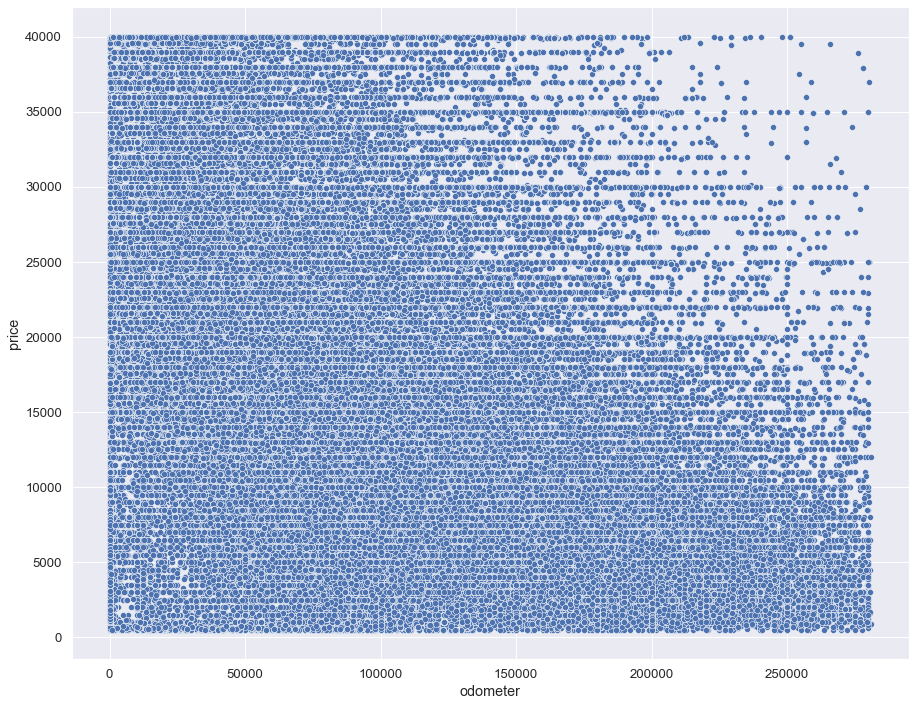

In [48]:
bx = sns.scatterplot(x="odometer", y="price", data=df)
bx.get_xaxis().get_major_formatter().set_scientific(False)
bx.get_yaxis().get_major_formatter().set_scientific(False)

In [20]:
rr=sorted(df["price"])


In [21]:
quantile1, quantile3= np.percentile(rr,[10,90])


In [22]:
print(quantile1,quantile3)


500.0 37590.0


In [23]:
df=df[(df.price < 40000) & (df.price >= 500 )]
df.shape

(355608, 14)

In [24]:
df["odometer"].max()


10000000.0

In [25]:
df=df[(df.odometer < 3000000)]


In [26]:
df["year"].min()


1900.0

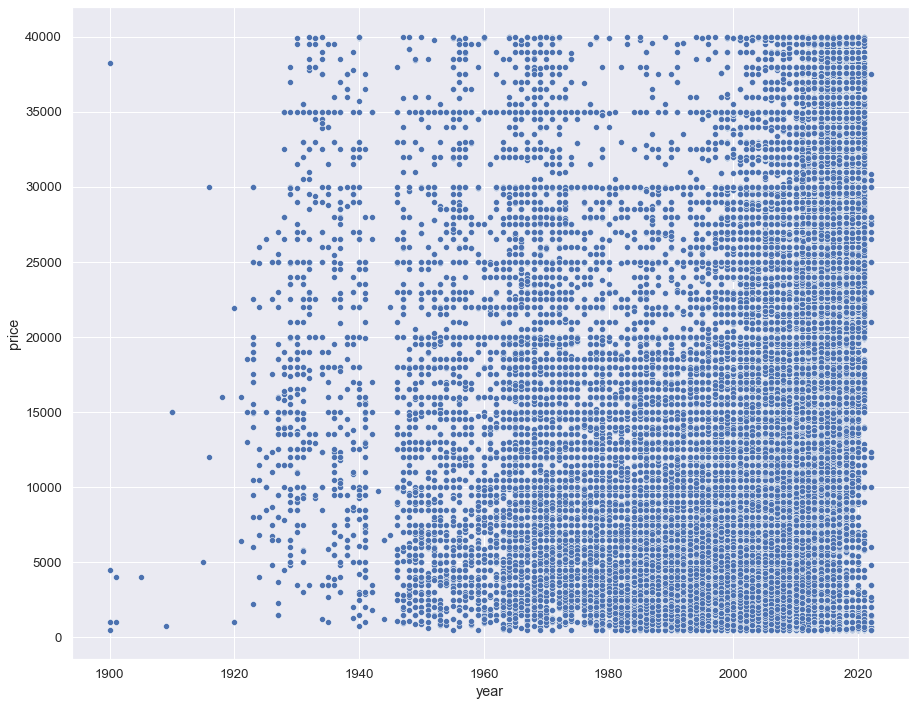

In [27]:
ax = sns.scatterplot(x="year", y="price", data=df)


In [28]:
df=df[(df.year > 1940)]


In [29]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
1,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
2,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
3,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
4,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white
426876,30590,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red
426877,34990,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white
426878,28990,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver


<a id='eda'></a>
# Exploratory Data Analysis

## Analysis questions 
> what is the price distribution  
what is the fuel tybe that has the most price  
what is the correlation between the car condition and price   
how can the transmission affect the price   
what is the most used cylinders in the cars  
how can the number of cylinders effect the price  
what is the title status count  
what is the price for each title status  
how can the drive type effect the price  
what is the most expensive car size  
what is the price for every car type  
what is count for the paint colors  
what is the most car condtition 
what is the top production years  
what is the most famous manufacturer 



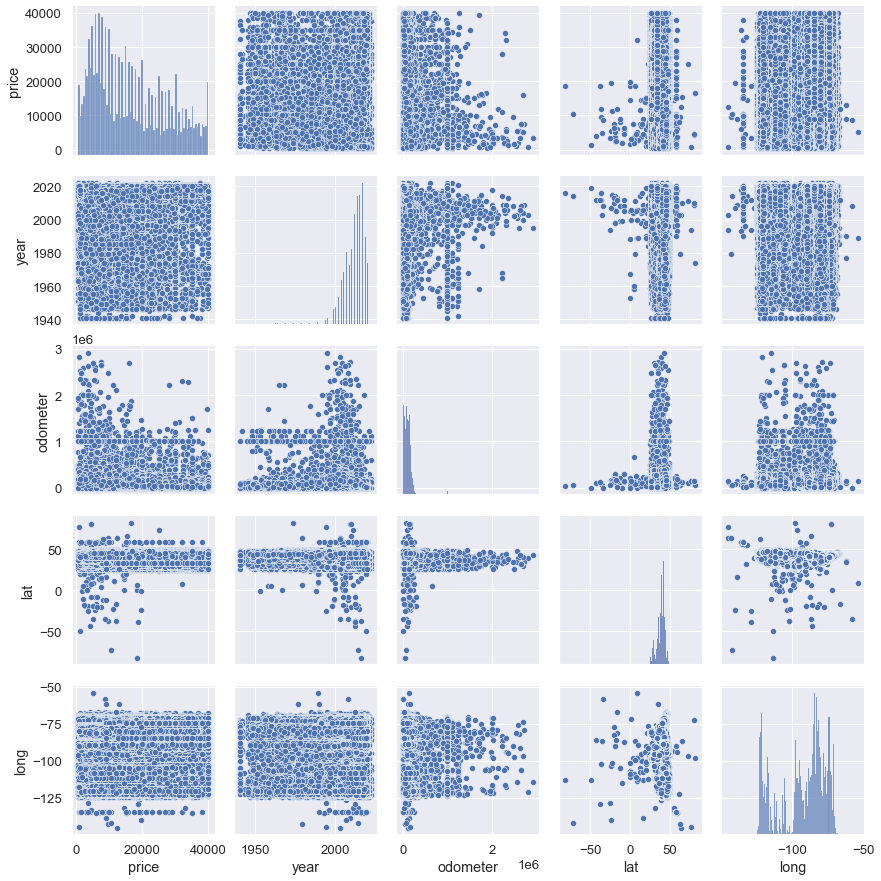

In [38]:
sns.pairplot(df)


In [39]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,az,38.493940,-94.748599
1,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,ar,38.493940,-94.748599
2,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,fl,38.493940,-94.748599
3,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,ma,38.493940,-94.748599
4,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,nc,38.493940,-94.748599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white,wy,33.786500,-84.445400
426876,30590,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red,wy,33.786500,-84.445400
426877,34990,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white,wy,33.779214,-84.411811
426878,28990,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver,wy,33.786500,-84.445400


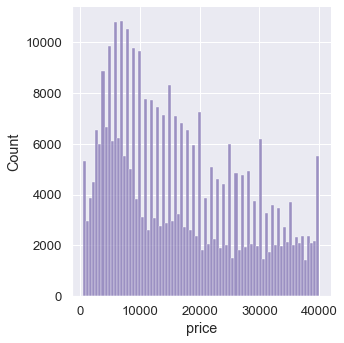

In [40]:
sns.displot(df['price'], kde=False, color='m')

Text(0.5, 1.0, 'Figure that shows the top fuel type for price')

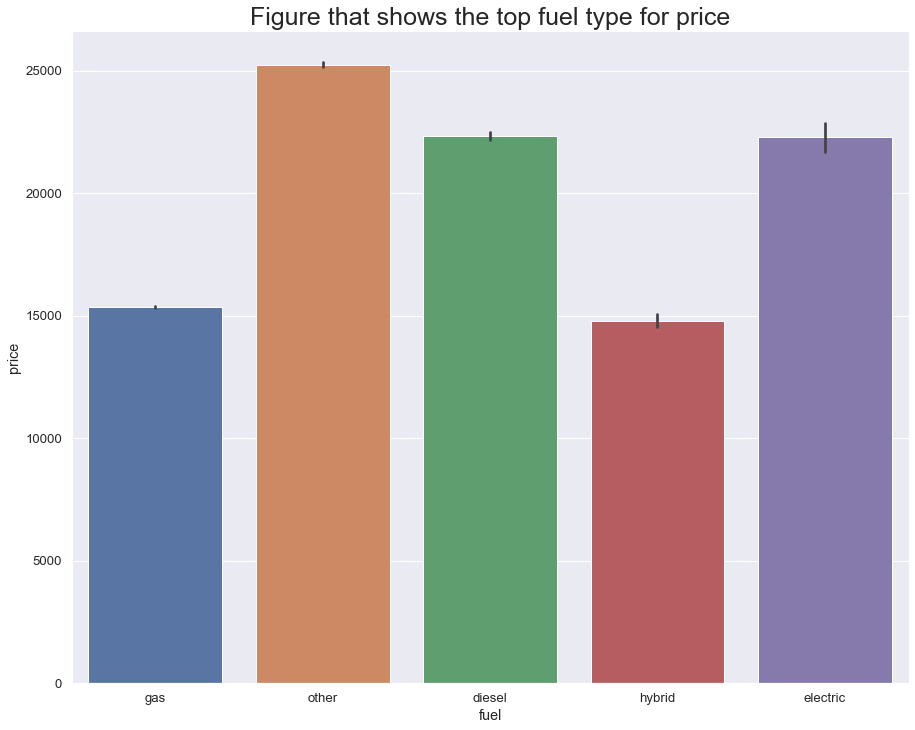

In [41]:
sns.barplot(x='fuel',y='price',data=df).set_title("Figure that shows the top fuel type for price",size=25)

Text(0.5, 1.0, 'Figure that shows the condition for price')

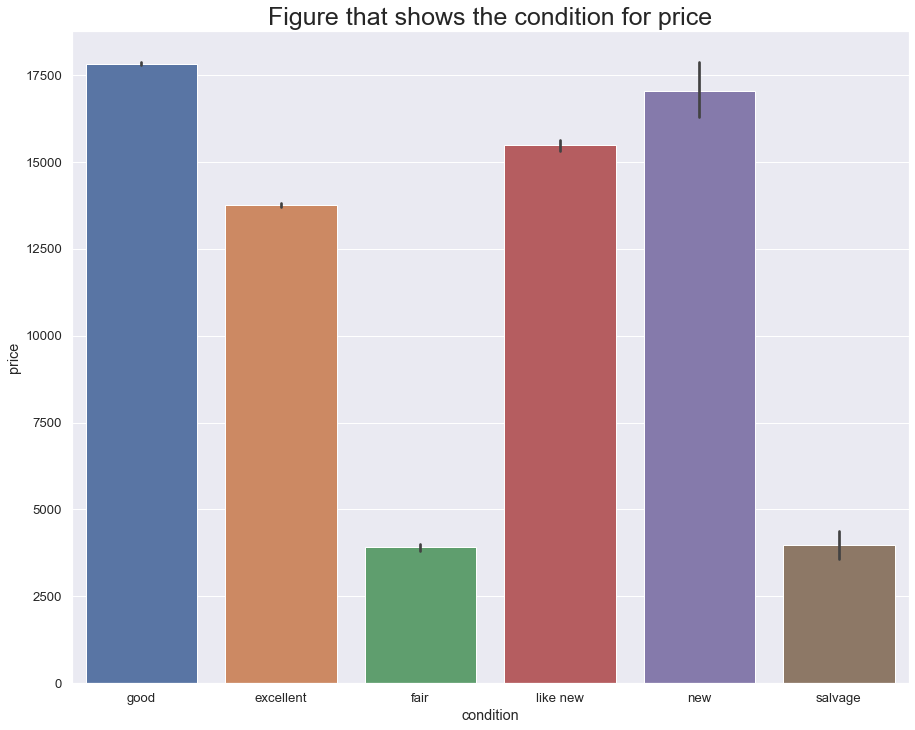

In [42]:
sns.barplot(x='condition',y='price',data=df).set_title("Figure that shows the condition for price",size=25)

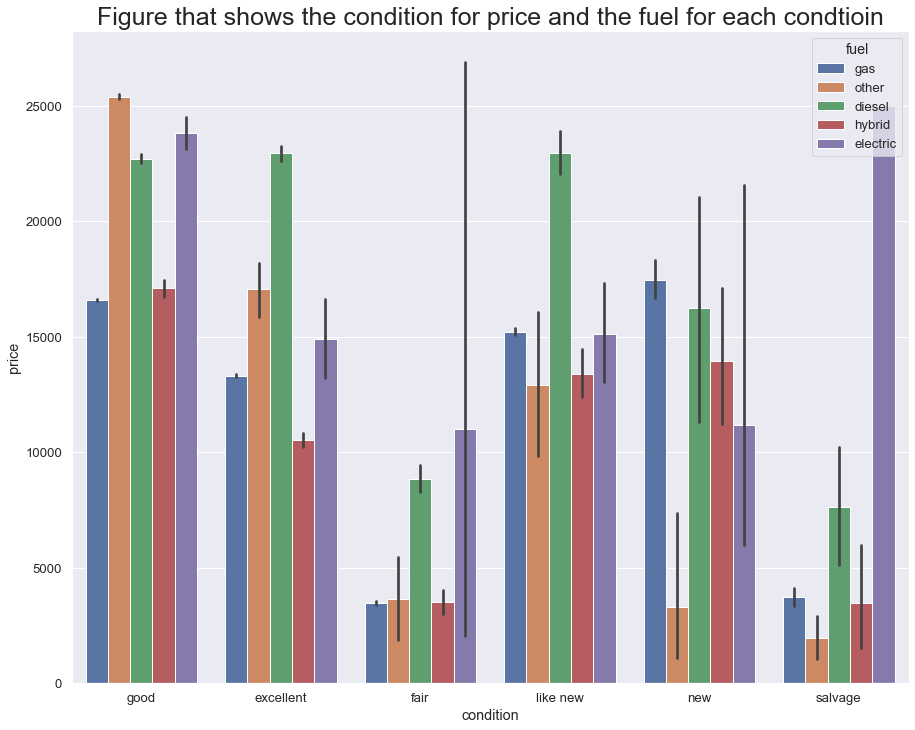

In [43]:
sns.barplot(x='condition',y='price',hue='fuel',data=df).set_title("Figure that shows the condition for price and the fuel for each condtioin",size=25);

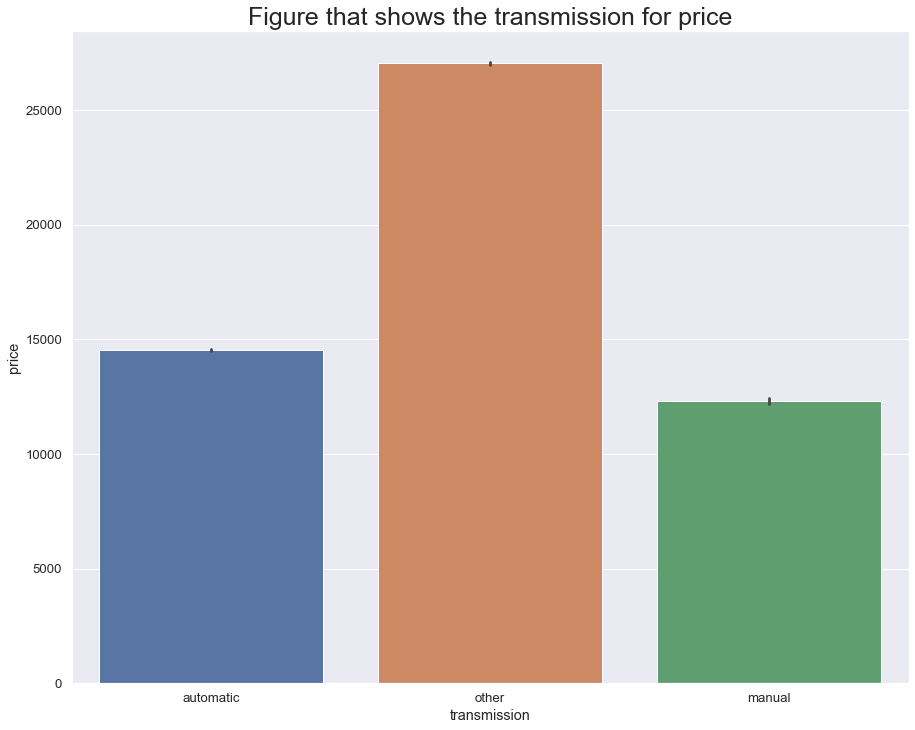

In [44]:
sns.barplot(x='transmission',y='price',data=df).set_title("Figure that shows the transmission for price",size=25);

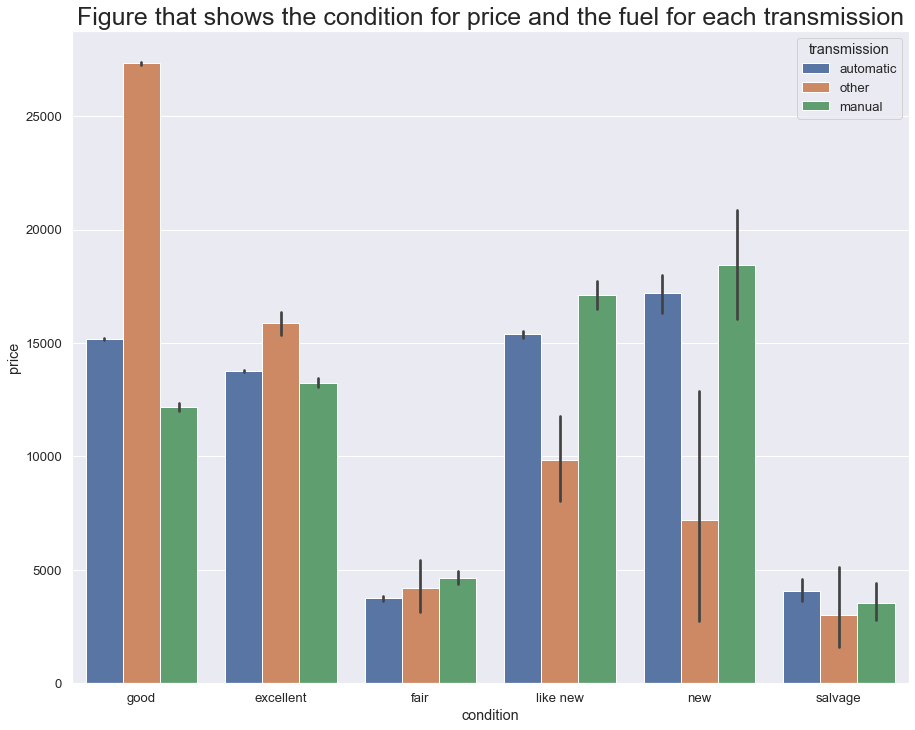

In [45]:
sns.barplot(x='condition',y='price',hue='transmission',data=df).set_title("Figure that shows the condition for price and the fuel for each transmission",size=25);

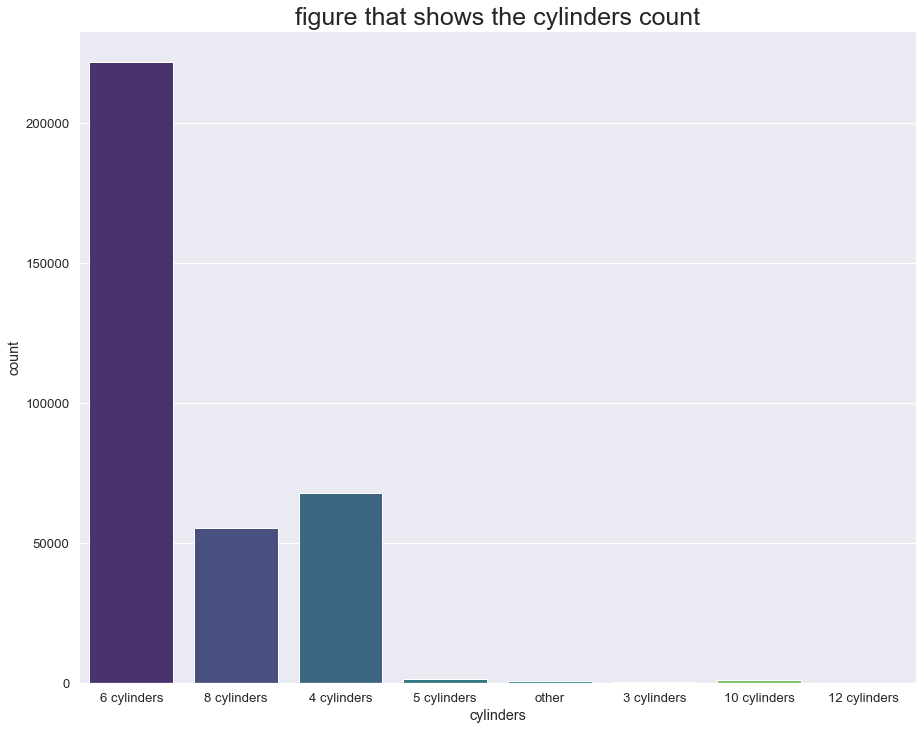

In [46]:
sns.countplot(x='cylinders', data=df, palette='viridis').set_title("figure that shows the cylinders count",size=25);

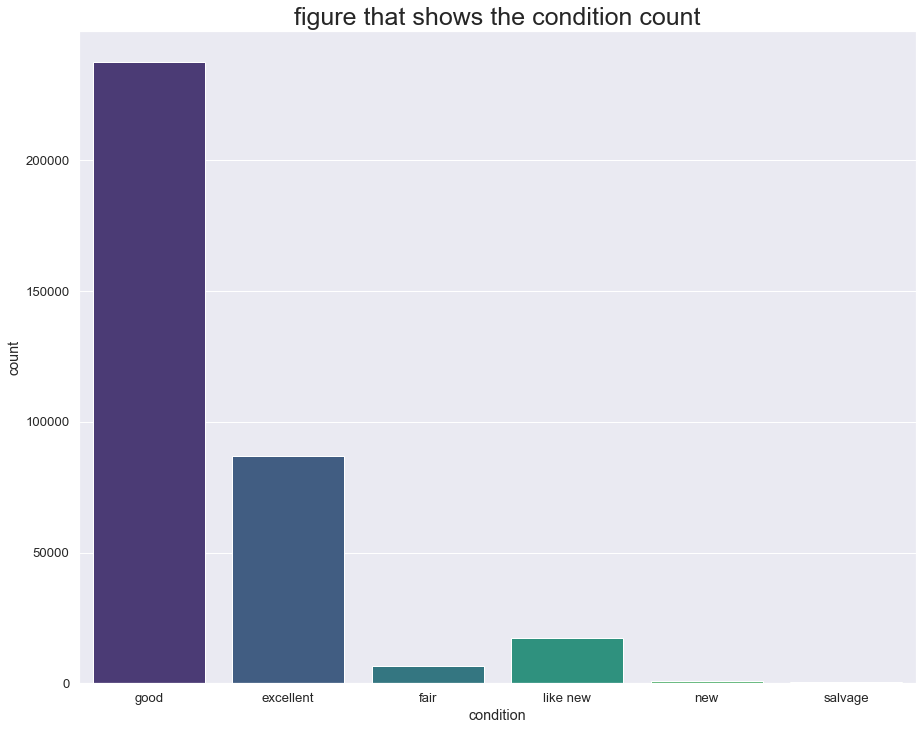

In [47]:
sns.countplot(x='condition', data=df, palette='viridis').set_title("figure that shows the condition count",size=25);

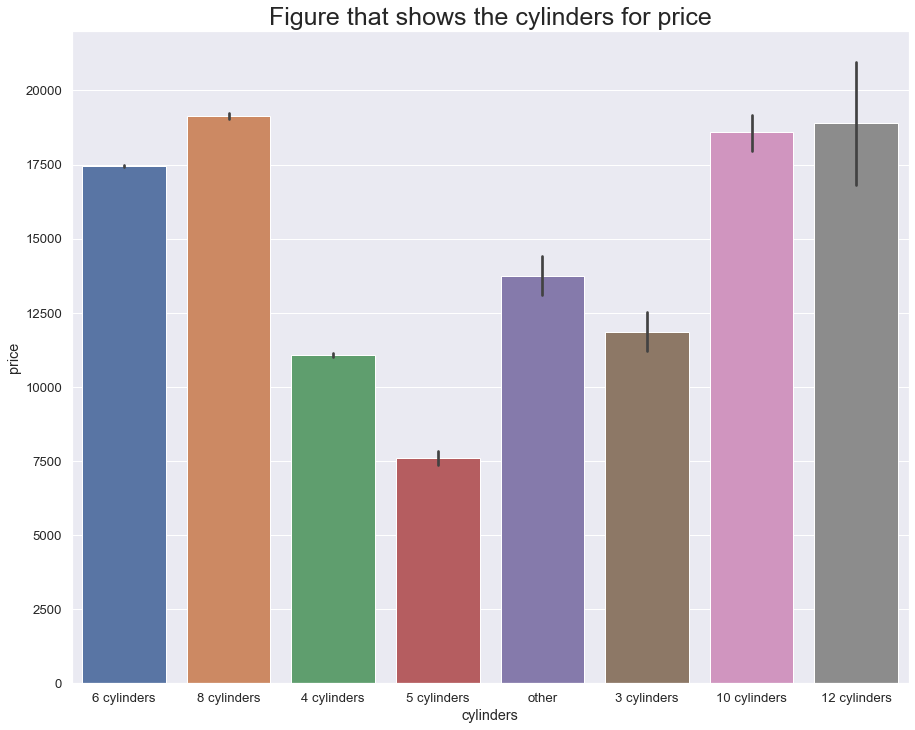

In [48]:
sns.barplot(x='cylinders',y='price',data=df).set_title("Figure that shows the cylinders for price",size=25);

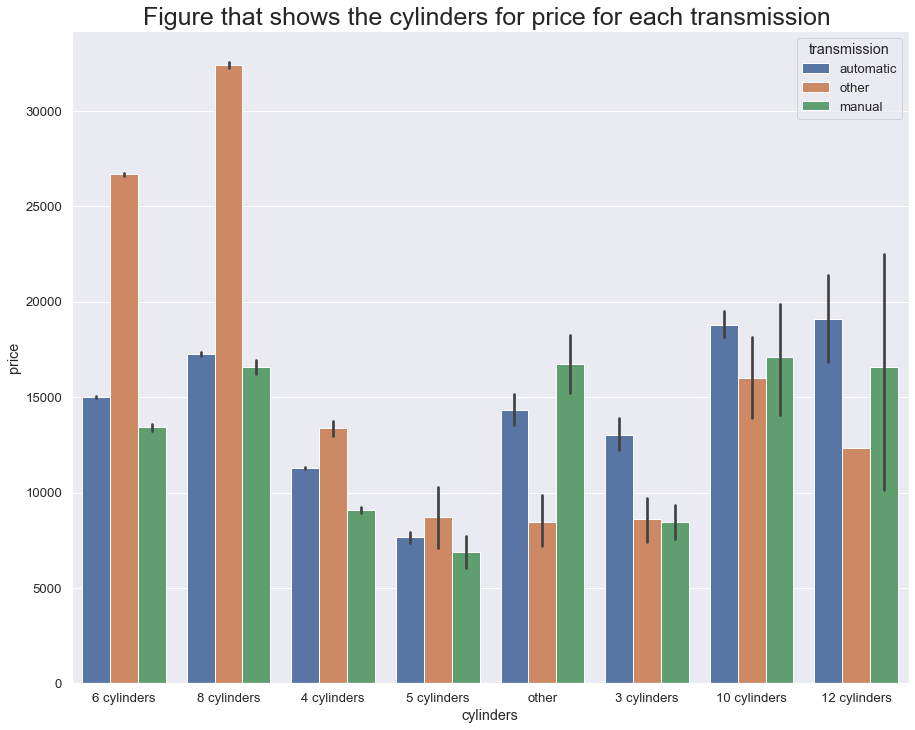

In [49]:
sns.barplot(x='cylinders',y='price',hue='transmission',data=df).set_title("Figure that shows the cylinders for price for each transmission ",size=25);

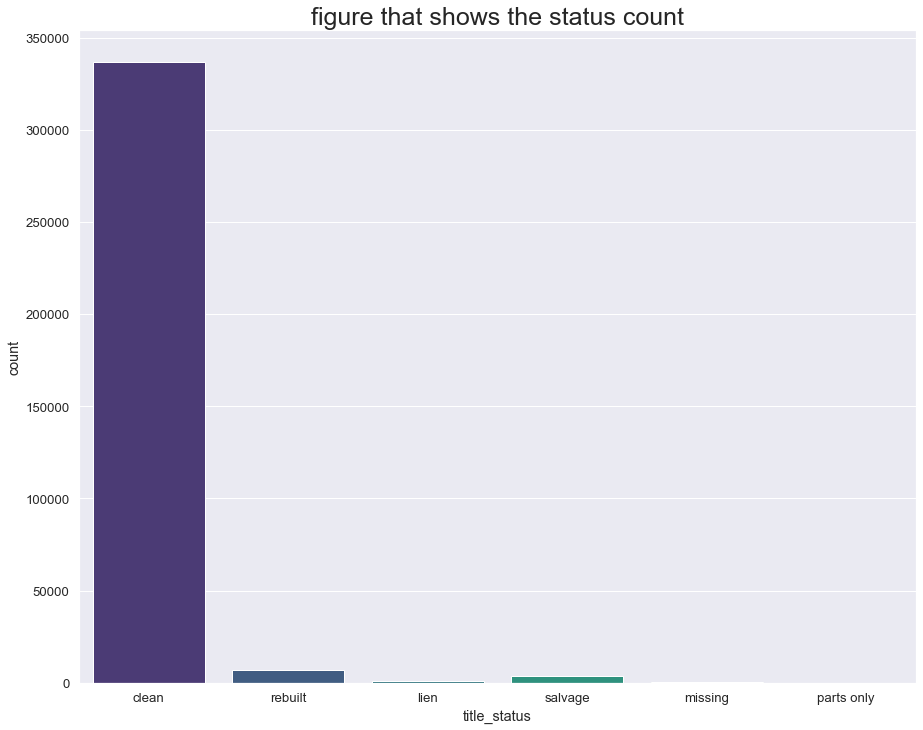

In [50]:
sns.countplot(x='title_status', data=df, palette='viridis').set_title("figure that shows the status count",size=25);

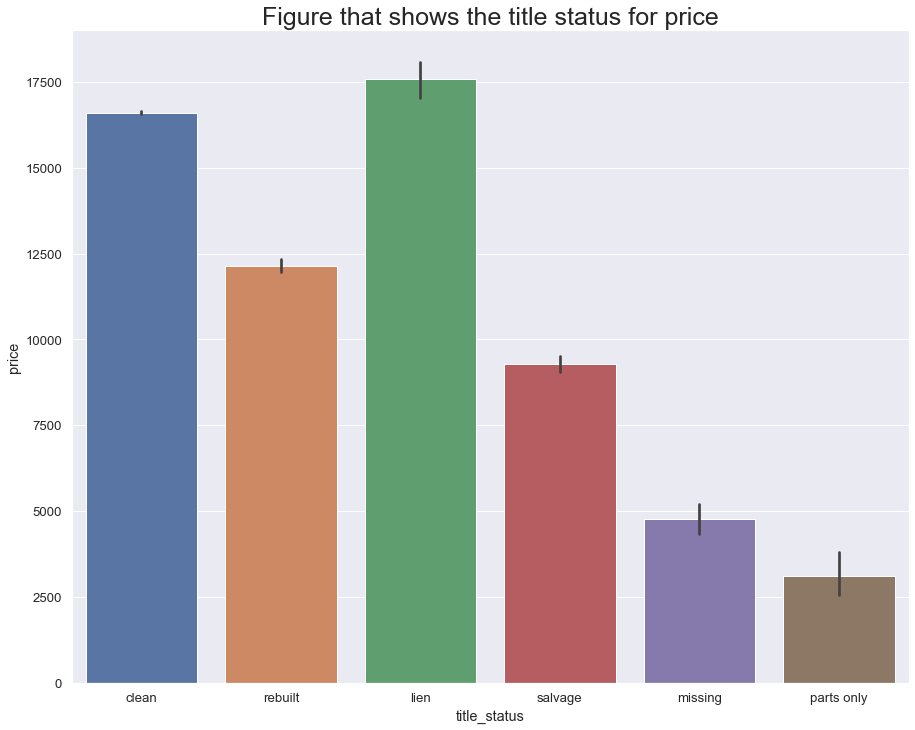

In [51]:
sns.barplot(x='title_status',y='price',data=df).set_title("Figure that shows the title status for price",size=25);

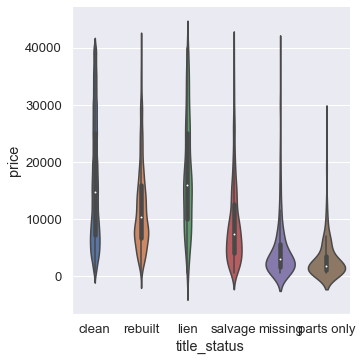

In [52]:
sns.catplot(x="title_status", y="price",kind="violin", data=df);


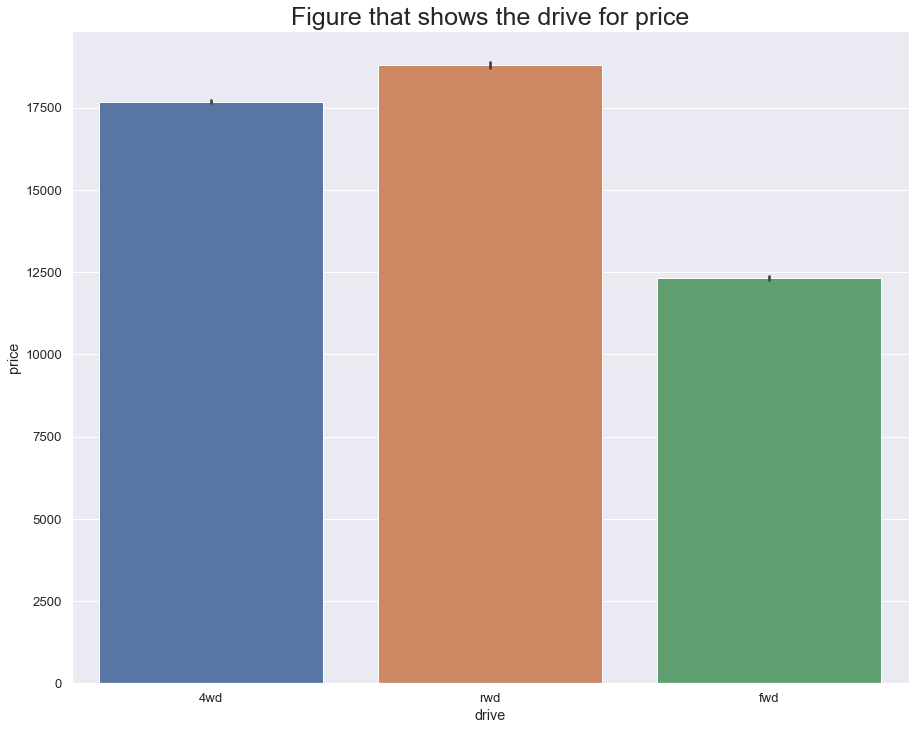

In [53]:
sns.barplot(x='drive',y='price',data=df).set_title("Figure that shows the drive for price",size=25);

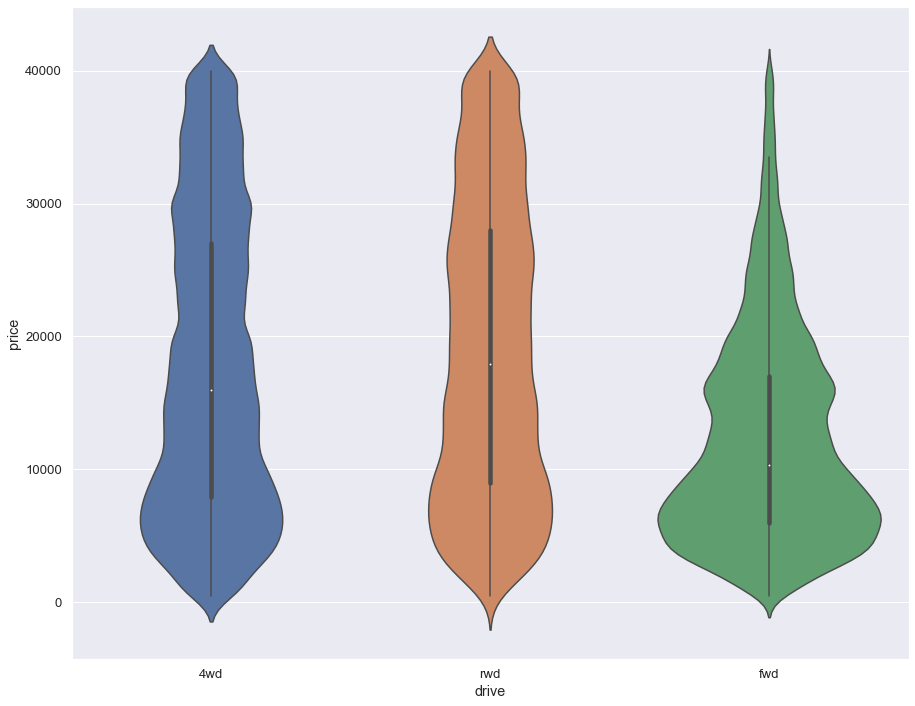

In [54]:
sns.violinplot(x='drive', y='price',data=df);


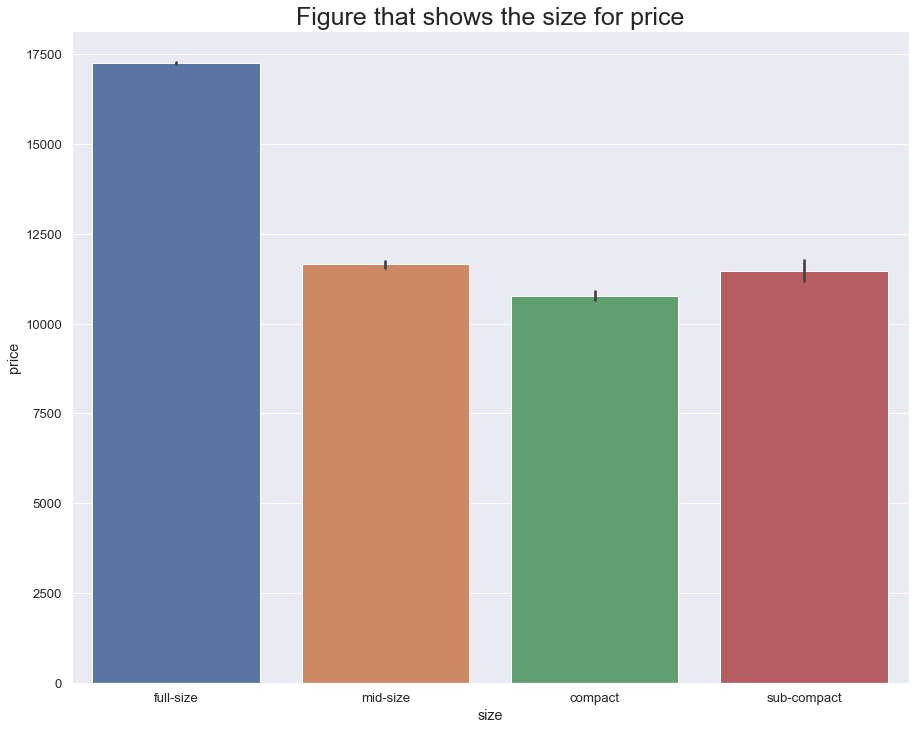

In [55]:
sns.barplot(x='size',y='price',data=df).set_title("Figure that shows the size for price",size=25);

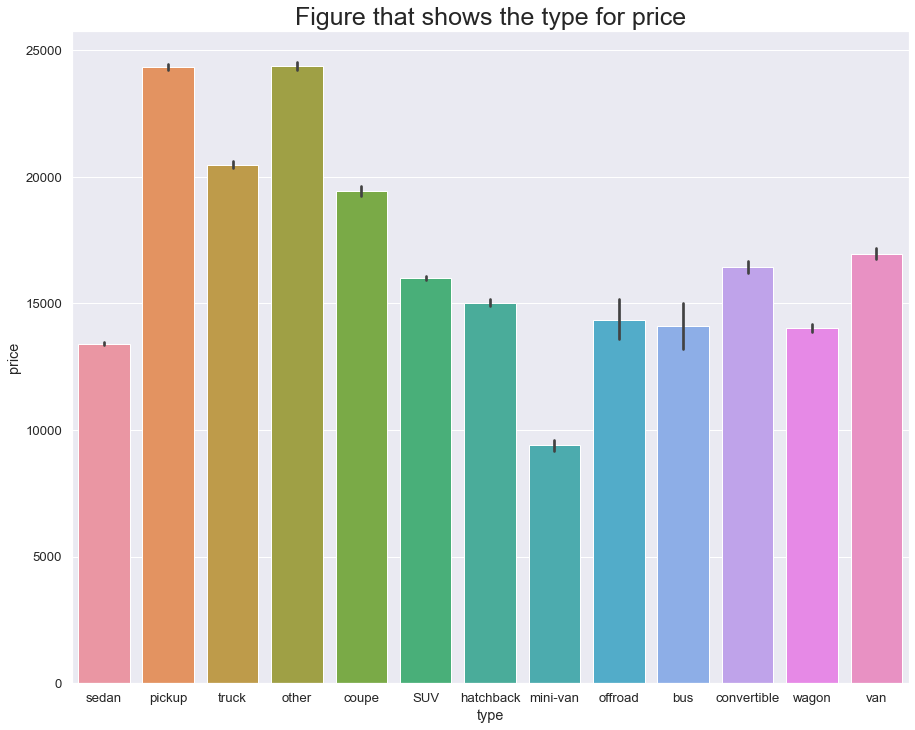

In [56]:
sns.barplot(x='type',y='price',data=df).set_title("Figure that shows the type for price",size=25);

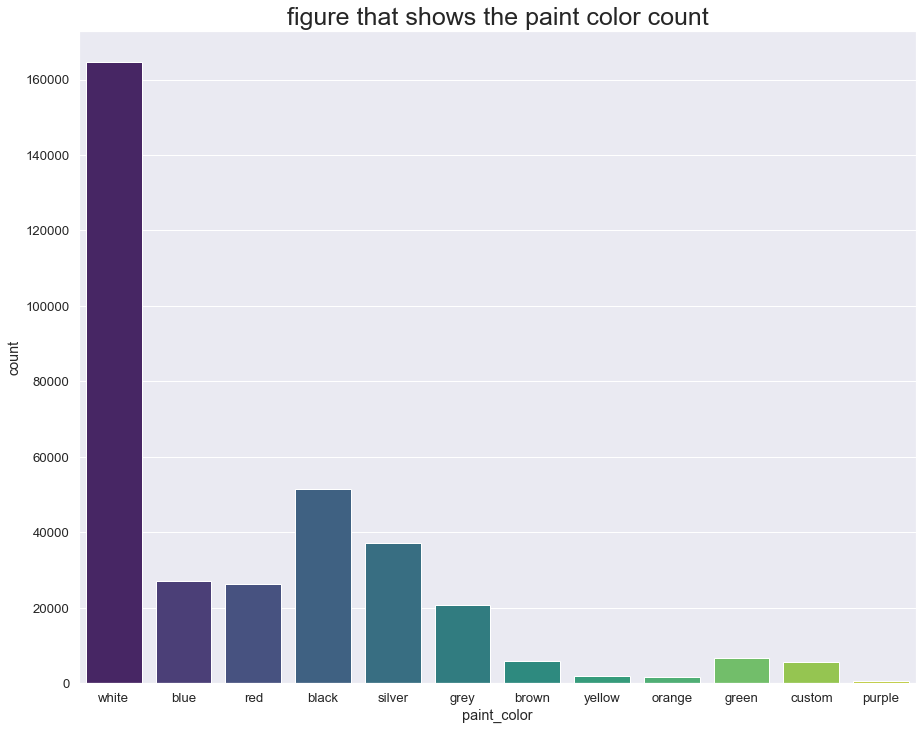

In [57]:
sns.countplot(x='paint_color', data=df, palette='viridis').set_title("figure that shows the paint color count",size=25);

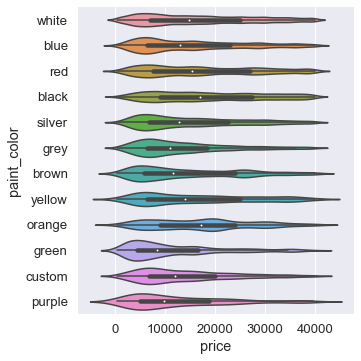

In [58]:
sns.catplot(y="paint_color", x="price",kind="violin", data=df);


In [59]:
temp = df.year.value_counts()
temp2 = temp.head(10)

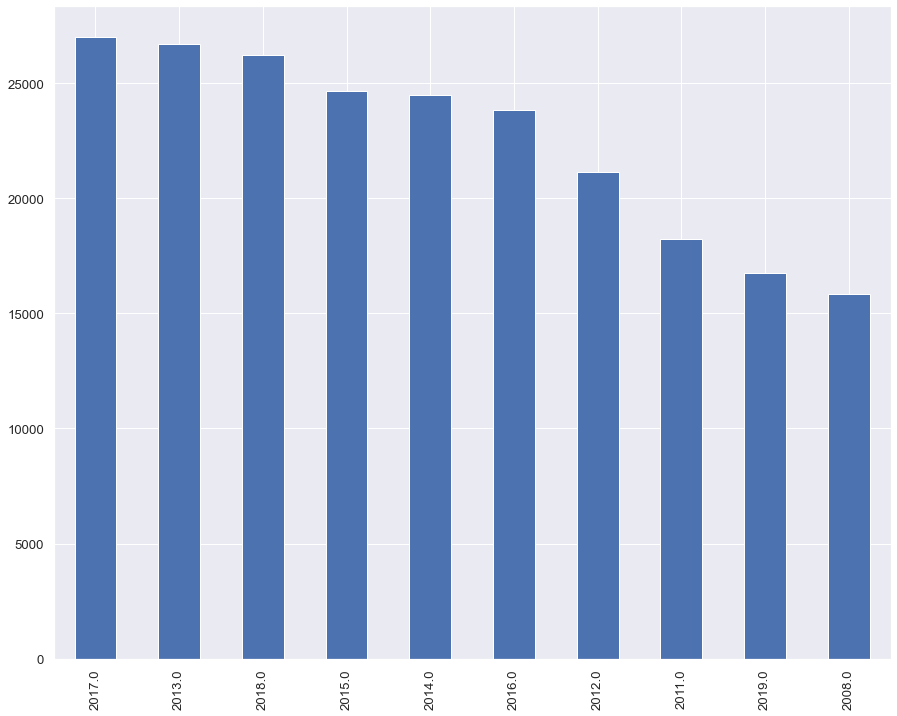

In [60]:
temp2.plot(kind='bar');


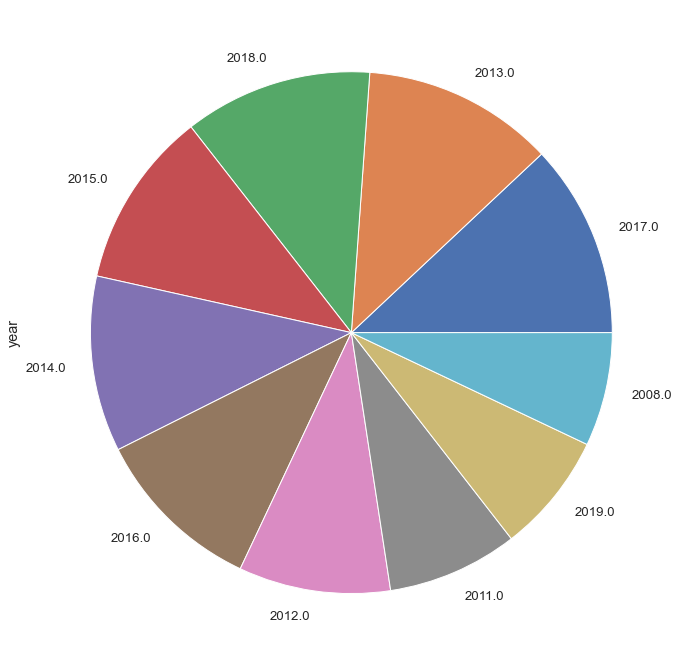

In [61]:
temp2.plot(kind='pie');


In [62]:
A = df.manufacturer.value_counts()
B = A.head(10)

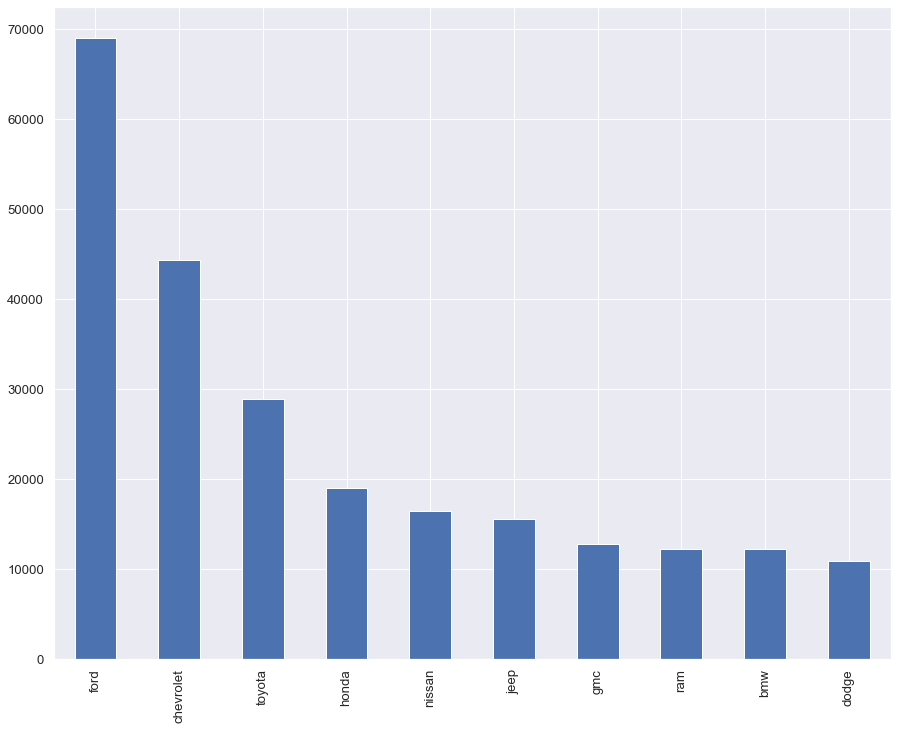

In [63]:
B.plot(kind='bar');


<AxesSubplot:>

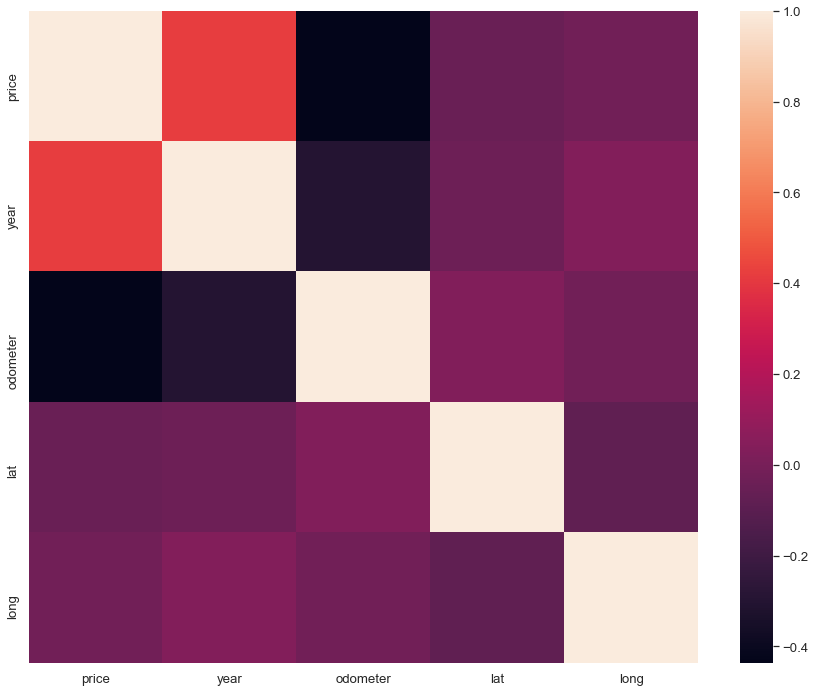

In [64]:
sns.heatmap(df.corr())

<a id='ML'></a>
# machine learning 

In [65]:
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long
0,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,az,38.493940,-94.748599
1,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,ar,38.493940,-94.748599
2,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,fl,38.493940,-94.748599
3,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,ma,38.493940,-94.748599
4,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white,nc,38.493940,-94.748599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.000000,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.000000,clean,other,fwd,full-size,sedan,white,wy,33.786500,-84.445400
426876,30590,2020.000000,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.000000,clean,other,fwd,full-size,sedan,red,wy,33.786500,-84.445400
426877,34990,2020.000000,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.000000,clean,other,4wd,full-size,hatchback,white,wy,33.779214,-84.411811
426878,28990,2018.000000,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.000000,clean,other,fwd,full-size,sedan,silver,wy,33.786500,-84.445400


In [36]:
cat_cols=['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

In [37]:
for i in cat_cols:
    print(f'For column {i}\n------------------\n')
    print(df[i].value_counts())
    print('\n')

For column manufacturer
------------------

ford               68540
chevrolet          44383
toyota             29195
honda              19168
nissan             16723
jeep               15795
gmc                12757
bmw                12397
ram                12250
dodge              11131
hyundai             9105
mercedes-benz       8920
subaru              8718
volkswagen          8449
lexus               7250
kia                 7229
audi                6213
cadillac            5968
chrysler            5475
acura               5261
mazda               4909
buick               4854
infiniti            4284
lincoln             3688
mitsubishi          2995
volvo               2981
mini                2187
pontiac             2154
jaguar              1605
rover               1507
mercury             1071
saturn              1058
porsche              974
alfa-romeo           824
fiat                 752
tesla                619
harley-davidson      136
datsun                59
land r

In [38]:
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
1,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
2,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
3,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white
4,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,full-size,sedan,white


In [39]:
from sklearn import preprocessing
cat_cols=['manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']
le1=preprocessing.LabelEncoder()
le2=preprocessing.LabelEncoder()
le3=preprocessing.LabelEncoder()
le4=preprocessing.LabelEncoder()
le5=preprocessing.LabelEncoder()
le6=preprocessing.LabelEncoder()
le7=preprocessing.LabelEncoder()
le8=preprocessing.LabelEncoder()
le9=preprocessing.LabelEncoder()
le10=preprocessing.LabelEncoder()
le11=preprocessing.LabelEncoder()
df['manufacturer']=le1.fit_transform(df['manufacturer'])
df['model']=le2.fit_transform(df['model'])
df['condition']=le3.fit_transform(df['condition'])
df['cylinders']=le4.fit_transform(df['cylinders'])
df['fuel']=le5.fit_transform(df['fuel'])
df['title_status']=le6.fit_transform(df['title_status'])
df['transmission']=le7.fit_transform(df['transmission'])
df['drive']=le8.fit_transform(df['drive'])
df['size']=le9.fit_transform(df['size'])
df['type']=le10.fit_transform(df['type'])
df['paint_color']=le11.fit_transform(df['paint_color'])

In [40]:
joblib.dump(le1,'encoding1.joblib')
joblib.dump(le2,'encoding2.joblib')
joblib.dump(le3,'encoding3.joblib')
joblib.dump(le4,'encoding4.joblib')
joblib.dump(le5,'encoding5.joblib')
joblib.dump(le6,'encoding6.joblib')
joblib.dump(le7,'encoding7.joblib')
joblib.dump(le8,'encoding8.joblib')
joblib.dump(le9,'encoding9.joblib')
joblib.dump(le10,'encoding10.joblib')
joblib.dump(le11,'encoding11.joblib')

['encoding11.joblib']

In [64]:
df.head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,6000,2011.235191,13,12031,2,5,2,98043.331443,0,0,0,1,9,10
1,11900,2011.235191,13,12031,2,5,2,98043.331443,0,0,0,1,9,10
2,21000,2011.235191,13,12031,2,5,2,98043.331443,0,0,0,1,9,10
3,1500,2011.235191,13,12031,2,5,2,98043.331443,0,0,0,1,9,10
4,4900,2011.235191,13,12031,2,5,2,98043.331443,0,0,0,1,9,10


In [65]:
for i in cat_cols:
    print(f'For column {i}\n------------------\n')
    print(df[i].value_counts())
    print('\n')

For column manufacturer
------------------

13    68496
7     44365
39    29171
16    19162
31    16722
20    15793
14    12746
4     12396
34    12241
10    11129
17     9105
26     8919
37     8717
40     8449
23     7247
21     7229
3      6213
6      5967
8      5475
0      5261
25     4909
5      4853
18     4284
24     3688
29     2995
41     2981
28     2187
32     2153
19     1605
35     1507
27     1071
36     1058
33      974
1       824
12      752
38      619
15      136
9        59
22        9
2         6
11        6
30        3
Name: manufacturer, dtype: int64


For column model
------------------

12031    9838
20817    3995
156      3205
8149     2720
6418     2620
         ... 
1374        1
7517        1
5468        1
20415       1
0           1
Name: model, Length: 24884, dtype: int64


For column condition
------------------

2    239007
0     87529
3     17595
1      6126
4       714
5       511
Name: condition, dtype: int64


For column cylinders
-----------------

In [41]:
# Split data to Train and Test Sets
x = df.drop('price', axis=1)
y = df['price']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [47]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


In [48]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(regressor.score(x_test,y_test)*100)

Mean Absolute Error: 1597.31
Mean Squared Error: 10425444.93
Root Mean Squared Error: 3228.85
91.03737992319991


In [50]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [51]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.score(x_test,y_test)*100)

Mean Absolute Error: 6006.62
Mean Squared Error: 60923304.74
Root Mean Squared Error: 7805.34
47.62502342525298


In [76]:
model = XGBRegressor(n_estimators = 500)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)


In [77]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print(model.score(x_test,y_test)*100)

Mean Absolute Error: 2173.52
Mean Squared Error: 12523653.62
Root Mean Squared Error: 3538.88
89.21202433617125


In [78]:
joblib.dump(model, 'model.h5')

['model.h5']

In [79]:
joblib.dump(scaler, 'scale.h5')

['scale.h5']